In [2]:
import numpy as np
import matplotlib.pylab as plt
#import pandas as pd
import os
from scipy.optimize import curve_fit

In [3]:
i=np.arange(0,10)
k=np.arange(10,29)
z_aux=np.arange(63,99)
#las frecuencias están en otro orden
frecuencia=[1000000,
900000,
1100000,
1200000,
1300000,
1400000,
1500000,
1600000,
1700000,
1800000,
1900000,
2000000,
2100000,
2200000,
2300000,
2400000,
2500000,
2800000,
3000000,
3500000,
4000000,
4500000,
5000000,
6000000,
7000000,
8000000,
9000000,
10000000,
12000000,
1,
2,
4,
6,
8,
10,
15,
20,
50,
100,
200,
300,
500,
800,
1000,
2000,
3000,
5000,
8000,
10000,
10000,
11000,
13000,
15000,
18000,
20000,
30000,
50000,
80000,
100000,
200000,
300000,
500000,
800000,
0,
0]

In [4]:
pulso=[] #van a estar desordenados

for j in i:
    #seno.append(np.genfromtxt('/home/josefina/Desktop/Datos0/ALL000{}/F000{}CH1.CSV'.format(j,j), delimiter=',',usecols = (3, 4)))
    pulso.append(np.genfromtxt("C:\\Users\\pc\\Downloads\\Labo6y7\\Cuadrada\\ALL000{}\\F000{}CH1.CSV".format(j,j), delimiter=',',usecols = (3, 4)))
    
for j in k:
    #seno.append(np.genfromtxt('/home/josefina/Desktop/Datos0/ALL00{}/F00{}CH1.CSV'.format(j,j), delimiter=',',usecols = (3, 4)))
    pulso.append(np.genfromtxt("C:\\Users\\pc\\Downloads\\Labo6y7\\Cuadrada\\ALL00{}\\F00{}CH1.CSV".format(j,j), delimiter=',',usecols = (3, 4)))

for j in z_aux:
    #donde a hayas guardado los otros Jose
    pulso.append(np.genfromtxt("C:\\Users\\pc\\Downloads\\Labo6y7\\Cuadrada\\ALL00{}\\F00{}CH1.CSV".format(j,j), delimiter=',',usecols = (3, 4)))


IOError: C:\Users\pc\Downloads\Labo6y7\Cuadrada\ALL0000\F0000CH1.CSV not found.

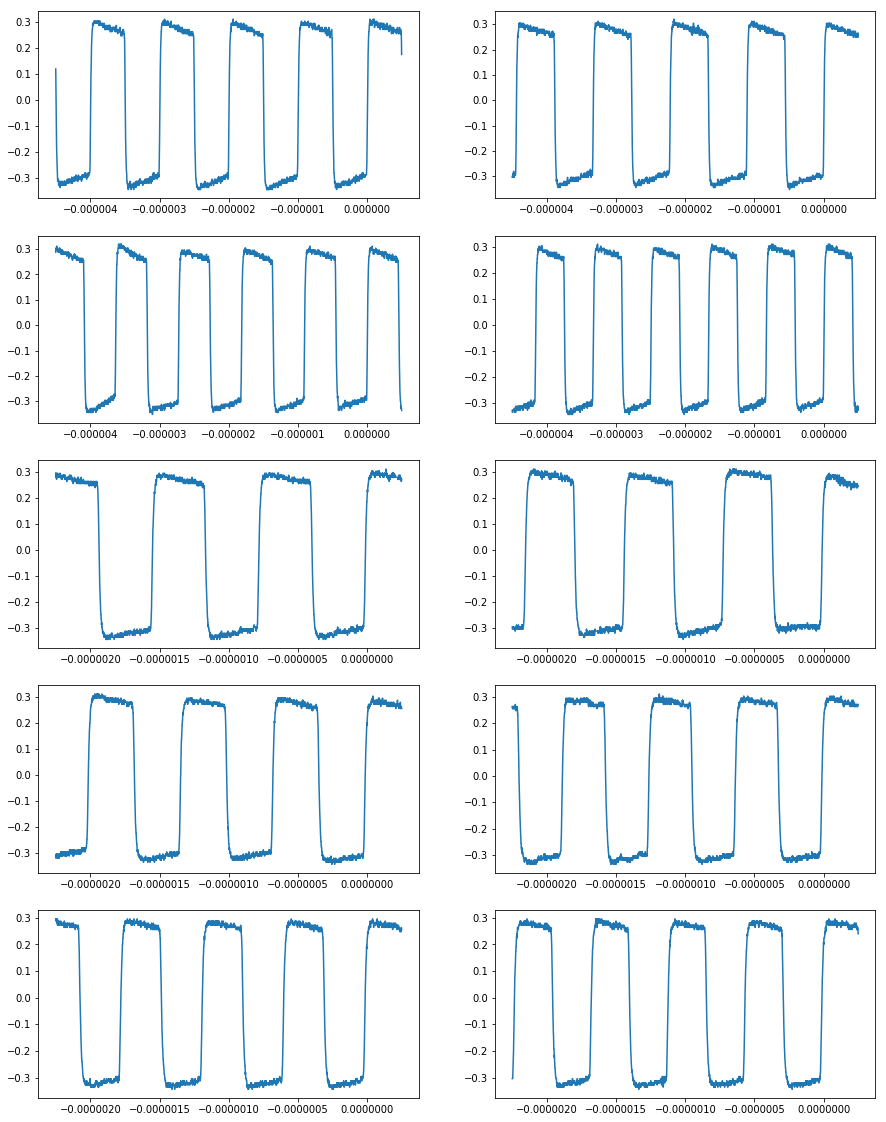

In [4]:
plt.figure(figsize=(15,20))
for j in i:
    plt.subplot(5,2,j+1)
    plt.plot(pulso[j][:,0],pulso[j][:,1])

#plt.savefig('Cuadrada_frec_1M-1.8M.png')
plt.show()

In [ ]:
plt.figure(figsize=(15,20))
for j in k:
    plt.subplot(10,3,j+1)
    plt.plot(pulso[j][:,0],pulso[j][:,1])

    
#plt.savefig('Cuadrada_frec_1.9M-12M.png')
plt.show()

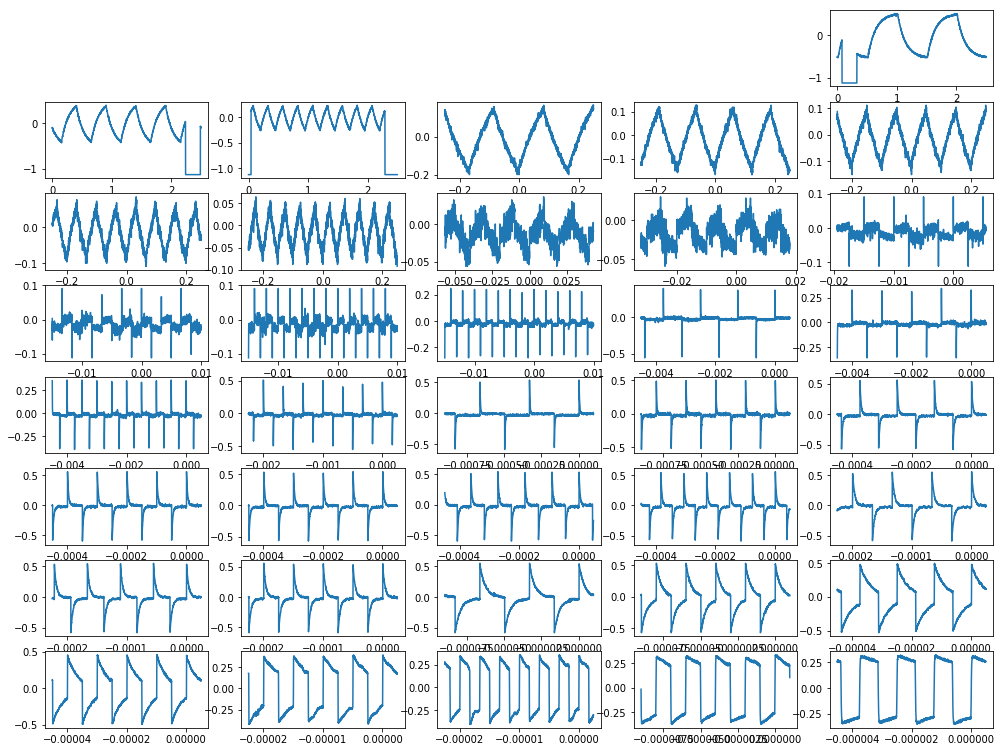

In [44]:
z = np.arange(29,65)
plt.figure(figsize=(17,25))
for j in z:
    plt.subplot(15,5,j+1)
    plt.plot(pulso[j][:,0],pulso[j][:,1])

#plt.savefig('Cuadrada_frec_1-800000.png')
plt.show()

In [ ]:
"""
f_sin = lambda x, A, B, C, D: A * np.sin(B*x+C)+D

# Ajustamos, pero con las funciónes logaritmicas. Usamos propagación de errores
def ajusteseno(datos,po):
    popt_sin, pcov_sin = curve_fit(f_sin, datos[:,0], datos[:,1], sigma = 0.005*np.ones(len(datos[:,1])), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

pulso[0]=pulso[0][100:2300,:]
pulso[1]=pulso[1][100:2300,:]

popt_sin, pcov_sin=ajusteseno(seno[30],po=[0.4,2*np.pi*frecuencia[30],0.04,0])
popt_sin
print pcov_sin[0]

l=np.arange(0,63)
A=[]
Aperr=[]
plt.figure(figsize=(15,50))
for j in l:
    
    
    
    popt_sin, pcov_sin=ajusteseno(seno[j],po=[0.7,2*np.pi*frecuencia[j],0.04,0])
    A.append(popt_sin[0])
    Aperr.append(np.sqrt(pcov_sin[0,0])) #CHEQUEAR si no entendí mal, este sería el error de la amplitud
    plt.subplot(13,5,j+1)
    plt.plot(seno[j][:,0],seno[j][:,1])
    plt.plot(seno[j][:,0],popt_sin[0] * np.sin(popt_sin[1]*seno[j][:,0]+popt_sin[2])+popt_sin[3])

plt.show()

"""

In [50]:
m=np.arange(0,65)
Vpp=[]
plt.figure(figsize=(15,50))
for j in m:
    Vmax = np.abs(np.max(pulso[j][:,1]))
    Vmin = np.abs(np.min(pulso[j][:,1]))
    Vpp.append((Vmax+Vmin))
   

errVpp = (0.005*np.sqrt(2)*np.ones(len(Vpp))).tolist()

#A = 0.5*Vpp
#errA = errVpp/2.0


TypeError: can't multiply sequence by non-int of type 'float'

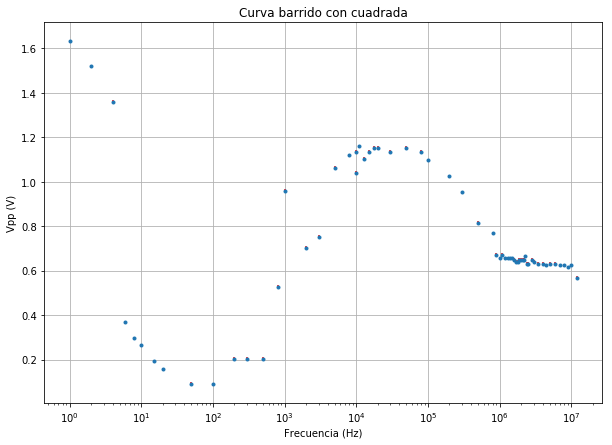

In [57]:
plt.figure(figsize=(10,7))
#plt.semilogx(frecuencia,np.abs(A),'.-')
plt.errorbar(frecuencia,Vpp, yerr=0.005*np.sqrt(2), fmt= '.', ecolor='r', )#,'.-')
plt.semilogx()
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Vpp (V)')
plt.title('Curva barrido con cuadrada')
#plt.savefig('Calibr_Vpp_cuad.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
#plt.semilogx(frecuencia,np.abs(A),'.-')
plt.errorbar(frecuencia,np.abs(A),Aperr, fmt= '.-', ecolor='r', )#,'.-')
plt.semilogx()
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.title('Curva barrido con cuadrada')
#plt.savefig('Calibr_A_cuad.png')
plt.show()

In [39]:
len(frecuencia)

63

In [35]:
len(errVpp)

65